## Fetching Dataset

In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

In [2]:
import numpy as np, pandas as pd

In [3]:
dataset = pd.read_csv("../Datasets/Social_Network_Ads.csv")

In [4]:
dataset.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
dataset.tail(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [6]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
dataset.rename(columns={"User ID": "UserID"}, inplace=True)

In [10]:
dataset.shape

(400, 5)

In [11]:
print("The dataset has a total of " + str(dataset.shape[0]) + " rows and " + str(dataset.shape[1]) + " columns.")

The dataset has a total of 400 rows and 5 columns.


In [12]:
dat_columns = dataset.columns
dat_columns

Index(['UserID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

## Data Visualization

In [13]:
import seaborn as sb
import matplotlib.pyplot as mpl

In [14]:
target = "Purchased"
num_cols = ["Age", "EstimatedSalary"]
cat_cols = ["Gender"]

### Univariate Distributions

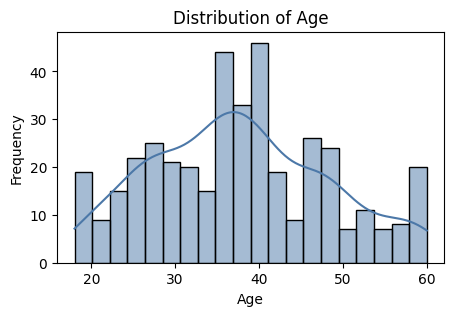

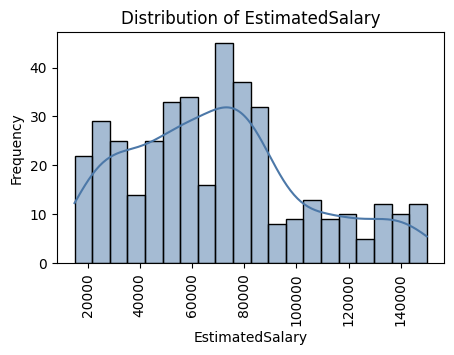

In [15]:
for col in num_cols:
    fig, ax = mpl.subplots(figsize=(5, 3))
    sb.histplot(dataset[col], kde=True, color="#4C78A8", bins=20, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    if(col == "EstimatedSalary"):
        mpl.xticks(rotation=90)
    mpl.show()

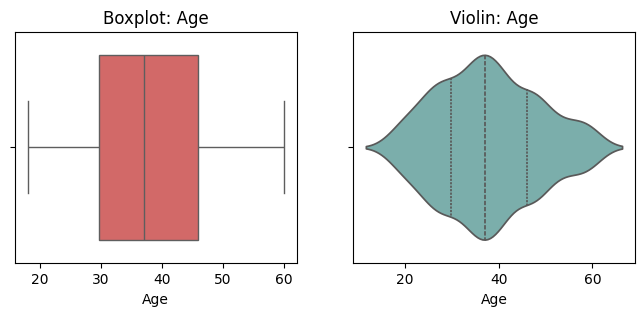

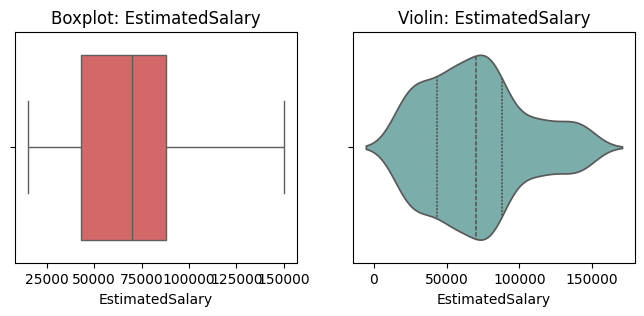

In [16]:
for col in num_cols:
    fig, axes = mpl.subplots(1, 2, figsize=(8, 3))
    sb.boxplot(x=dataset[col], ax=axes[0], color="#E45756")
    sb.violinplot(x=dataset[col], ax=axes[1], color="#72B7B2", inner="quartile")
    axes[0].set_title(f'Boxplot: {col}')
    axes[1].set_title(f'Violin: {col}')
    mpl.show()

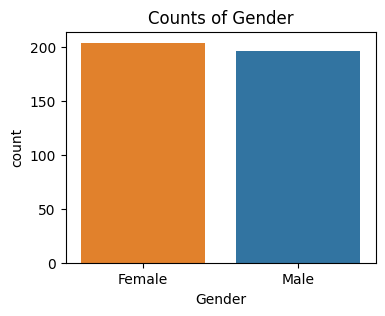

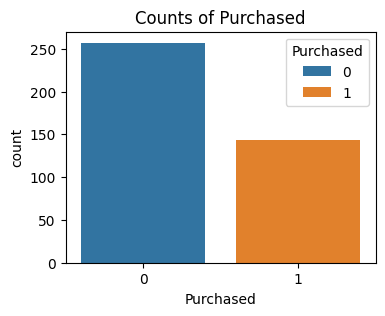

In [17]:
for col in cat_cols + ([target] if target in dataset.columns else []):
    fig, ax = mpl.subplots(figsize=(4, 3))
    order = dataset[col].value_counts().index
    sb.countplot(data=dataset, x=col, order=order, ax=ax, hue=col)
    ax.set_title(f'Counts of {col}')
    mpl.show()

### Relationships: Numeric vs Numeric

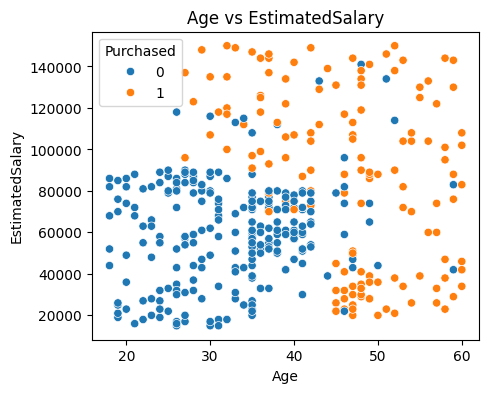

In [18]:
x, y = ['Age', 'EstimatedSalary']
fig, ax = mpl.subplots(figsize=(5, 4))
sb.scatterplot(data=dataset, x=x, y=y, hue=target, ax=ax)
ax.set_title(f'{x} vs {y}')
mpl.show()


### Relationships: Categorical vs Numeric

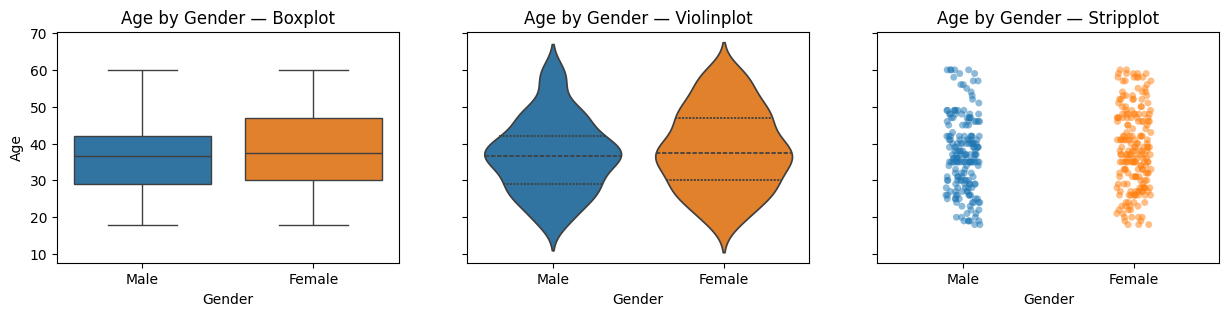

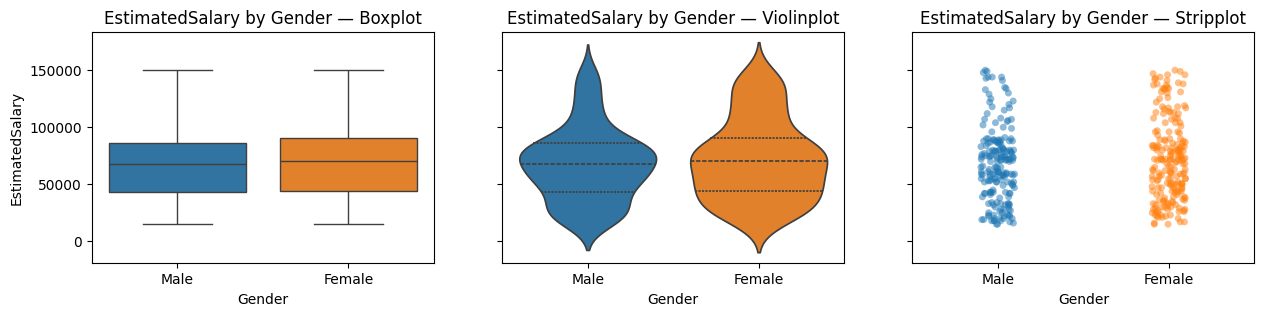

In [19]:
for col in num_cols:
    fig, axes = mpl.subplots(1, 3, figsize=(15, 3), sharey=True)
    sb.boxplot(data=dataset, x='Gender', y=col, ax=axes[0], hue='Gender')
    sb.violinplot(data=dataset, x='Gender', y=col, inner='quartile', ax=axes[1], hue='Gender')
    sb.stripplot(data=dataset, x='Gender', y=col, alpha=0.5, ax=axes[2], hue='Gender')
    axes[0].set_title(f'{col} by Gender — Boxplot')
    axes[1].set_title(f'{col} by Gender — Violinplot')
    axes[2].set_title(f'{col} by Gender — Stripplot')
    mpl.show()

### Target-aware Plots

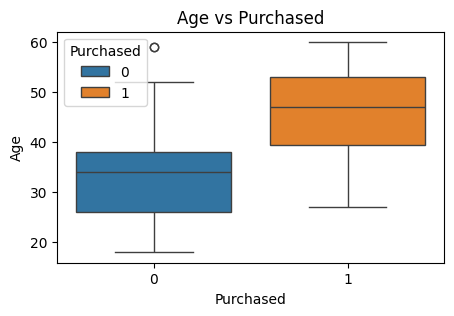

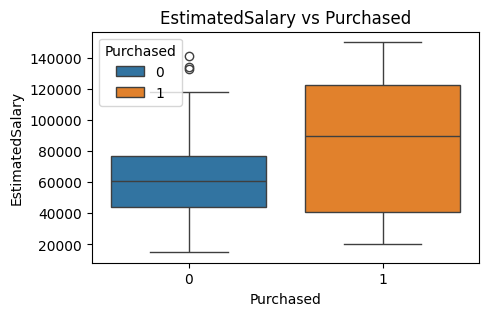

In [20]:
# Boxplots by target
for col in num_cols:
    fig, ax = mpl.subplots(figsize=(5,3))
    sb.boxplot(data=dataset, x=target, y=col, ax=ax, hue=target)
    ax.set_title(f'{col} vs {target}')
    mpl.show()

In [21]:
ct = pd.crosstab(dataset['Gender'], dataset[target])
ct

Purchased,0,1
Gender,,
Female,127,77
Male,130,66


In [22]:
ct = pd.crosstab(dataset['Gender'], dataset[target], normalize='index')
ct

Purchased,0,1
Gender,,
Female,0.622549,0.377451
Male,0.663265,0.336735


In [23]:
ct = pd.crosstab(dataset['Gender'], dataset[target], normalize='columns')
ct

Purchased,0,1
Gender,,
Female,0.494163,0.538462
Male,0.505837,0.461538


In [24]:
ct = pd.crosstab(dataset['Gender'], dataset[target], normalize='index') * 100
ct

Purchased,0,1
Gender,,
Female,62.254902,37.745098
Male,66.326531,33.673469


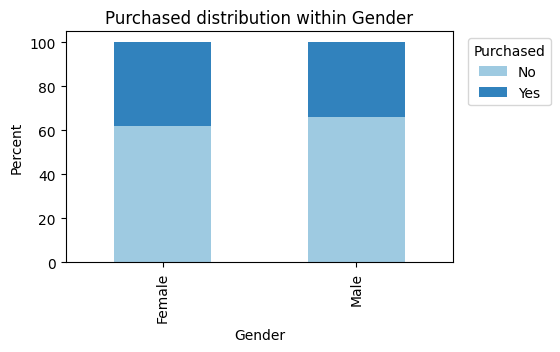

In [25]:
# Stacked/normalized bar: Purchased by Gender
ct = pd.crosstab(dataset['Gender'], dataset[target], normalize='index') * 100
ct = ct.rename(columns={0:'No', 1:'Yes'})
ct[['No','Yes']].plot(kind='bar', stacked=True, color=['#9ecae1','#3182bd'], figsize=(5, 3))
mpl.ylabel('Percent')
mpl.title('Purchased distribution within Gender')
mpl.legend(title='Purchased', bbox_to_anchor=(1.02,1), loc='upper left')
mpl.show()